# MODEL TRAINING

## Import Data and Required Packages





In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Import CSV Data as Pandas Dataframe

In [4]:
df = pd.read_csv("/content/aqi.csv")

In [ ]:
df.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,10-01-2024,KZ,Nur-Sultan,wind-speed,24,6.0,14.5,10.2,51.31
1,24-01-2024,KZ,Nur-Sultan,wind-speed,24,1.0,4.6,2.0,8.47
2,16-03-2024,KZ,Nur-Sultan,wind-speed,24,6.0,10.8,8.2,24.64
3,24-03-2024,KZ,Nur-Sultan,wind-speed,24,1.0,7.7,3.2,59.95
4,17-05-2024,KZ,Nur-Sultan,wind-speed,24,2.0,4.1,3.0,4.03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048571 entries, 0 to 1048570
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Date      1048571 non-null  object 
 1   Country   1048571 non-null  object 
 2   City      1048571 non-null  object 
 3   Specie    1048571 non-null  object 
 4   count     1048571 non-null  int64  
 5   min       1048571 non-null  float64
 6   max       1048571 non-null  float64
 7   median    1048571 non-null  float64
 8   variance  1048571 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 72.0+ MB


In [ ]:
df.describe()

,count,min,max,median,variance
count,1.048571e+06,1.048571e+06,1.048571e+06,1.048571e+06,1.048571e+06
mean,1.112343e+02,1.108618e+02,1.384712e+02,1.217028e+02,2.685148e+03
std,1.485999e+02,2.963185e+02,2.987317e+02,2.961511e+02,5.194643e+04
min,2.000000e+00,-3.273900e+03,-3.600000e+01,-3.900000e+01,0.000000e+00
25%,3.600000e+01,1.000000e+00,9.900000e+00,4.100000e+00,1.830000e+01
50%,7.100000e+01,6.000000e+00,2.640000e+01,1.410000e+01,9.955000e+01
75%,1.380000e+02,2.500000e+01,8.330000e+01,4.900000e+01,6.654800e+02
max,2.232000e+03,1.100000e+03,3.275100e+03,1.100000e+03,2.307340e+07


In [ ]:
df.isnull().sum()

Date        0
Country     0
City        0
Specie      0
count       0
min         0
max         0
median      0
variance    0
dtype: int64

In [ ]:
X = df.drop('median', axis=1)
y = df['median']

In [5]:
X = df[['Date', 'Country', 'City', 'Specie', 'count', 'min', 'max', 'variance']]
y = df['median']

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_features = X.select_dtypes(exclude=["object"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

# Create ColumnTransformer with transformers
preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [7]:
X_preprocessed = preprocessor.fit_transform(X)

In [8]:
def eval_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

In [12]:
# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
}

# Lists to store model names and R-squared scores
model_list = []
r2_list = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate on training data
    train_mae, train_rmse, train_r2 = eval_model(y_train, y_train_pred)

    # Evaluate on testing data
    test_mae, test_rmse, test_r2 = eval_model(y_test, y_test_pred)

    print(f"Model: {name}")
    print(f"Training Set Performance: MAE = {train_mae}, RMSE = {train_rmse}, R² = {train_r2}")
    print(f"Testing Set Performance: MAE = {test_mae}, RMSE = {test_rmse}, R² = {test_r2}")

    model_list.append(name)
    r2_list.append(test_r2)

# Create a DataFrame to summarize the results
results = pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model Name", "R² Score"]).sort_values(by="R² Score", ascending=False)
print(results)

Model: Linear Regression
Training Set Performance: MAE = 7.046914923768819, RMSE = 18.567795213355666, R² = 0.9960636406859069
Testing Set Performance: MAE = 7.030333879788067, RMSE = 18.552748779624814, R² = 0.9960969922850584
Model: Decision Tree Regressor
Training Set Performance: MAE = 6.015762668160384e-16, RMSE = 1.0227129941003925e-14, R² = 1.0
Testing Set Performance: MAE = 3.3922122881052856, RMSE = 11.385506509670487, R² = 0.998530100663595
Model: AdaBoost Regressor
Training Set Performance: MAE = 10.851009612413872, RMSE = 18.462156326868115, R² = 0.9961083040074376
Testing Set Performance: MAE = 10.818449479063574, RMSE = 18.35266272068521, R² = 0.9961807239571828
                Model Name  R² Score
1  Decision Tree Regressor  0.998530
2       AdaBoost Regressor  0.996181
0        Linear Regression  0.996097


Accuracy of the model is: 1.00


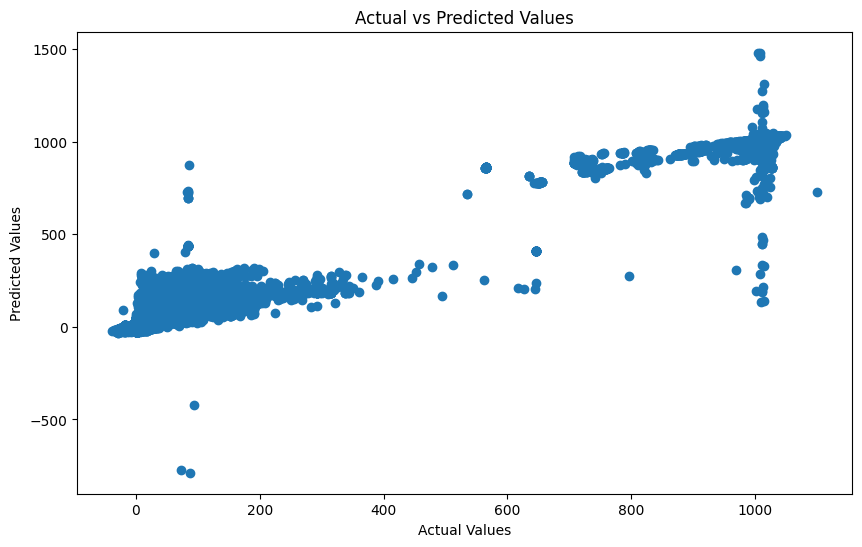

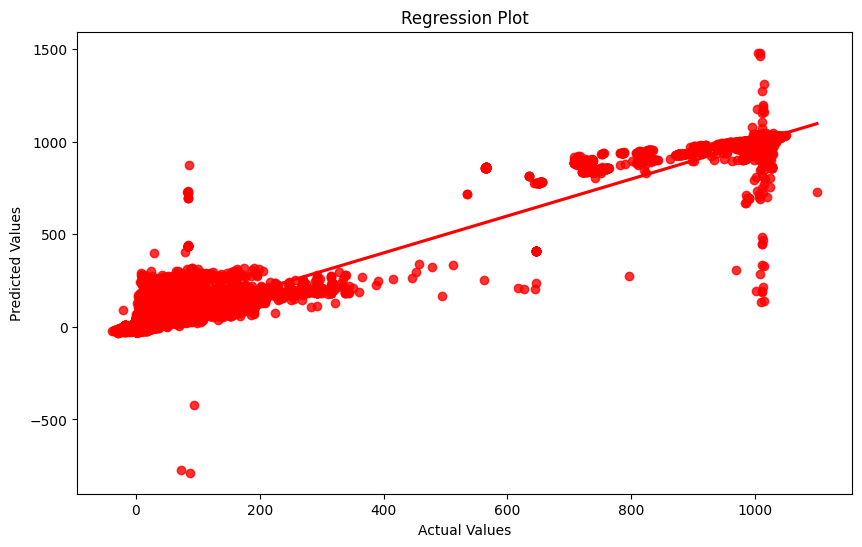

        Actual Value  Predicted Value  Difference
915962           5.5         8.002459   -2.502459
357840        1011.0      1007.324089    3.675911
613197           3.0         6.088792   -3.088792
797615         890.2       934.909146  -44.709146
673036           1.2         3.360337   -2.160337


In [11]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)

score = r2_score(y_test, y_pred)
print(f"Accuracy of the model is: {score:.2f}")

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Regression plot for y_test vs y_pred
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')
plt.title('Regression Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Difference between actual and predicted values
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
print(pred_df.head())